Introduction to Linear Regression

Objectives
###### 1.Analyze pandas dataframe 
###### 2.Create seaborn plots for Exploratory Data Analysis
###### 3.Train a Linear Regression model using Scikit-Learn

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df_USAhousing = pd.read_csv('USA_Housing.csv')
df_USAhousing.columns = [x.lower().strip() for x in df_USAhousing.columns]
df_USAhousing.head()

,avg. area income,avg. area house age,avg. area number of rooms,avg. area number of bedrooms,area population,price,address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [56]:
#checking for null value
df_USAhousing.isna().sum()

avg. area income                0
avg. area house age             0
avg. area number of rooms       0
avg. area number of bedrooms    0
area population                 0
price                           0
address                         0
dtype: int64

In [57]:
#checking for Data Type
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg. area income              5000 non-null   float64
 1   avg. area house age           5000 non-null   float64
 2   avg. area number of rooms     5000 non-null   float64
 3   avg. area number of bedrooms  5000 non-null   float64
 4   area population               5000 non-null   float64
 5   price                         5000 non-null   float64
 6   address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [58]:
#pandas describe() function is used to view the statistical detail of the dataframe
df_USAhousing.describe()

,avg. area income,avg. area house age,avg. area number of rooms,avg. area number of bedrooms,area population,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [59]:
#to summarize
print('rows   :',df_USAhousing.shape[0])
print('columns   :',df_USAhousing.shape[1])
print('\nFeatures   : \n',df_USAhousing.columns.tolist())
print('\nUnique_value   :\n',df_USAhousing.nunique())
print('\nMissing_values   :\n',df_USAhousing.isnull().sum().values.sum())

rows   : 5000
columns   : 7

Features   : 
 ['avg. area income', 'avg. area house age', 'avg. area number of rooms', 'avg. area number of bedrooms', 'area population', 'price', 'address']

Unique_value   :
 avg. area income                5000
avg. area house age             5000
avg. area number of rooms       5000
avg. area number of bedrooms     255
area population                 5000
price                           5000
address                         5000
dtype: int64

Missing_values   :
 0


Exploratory Data Analysis

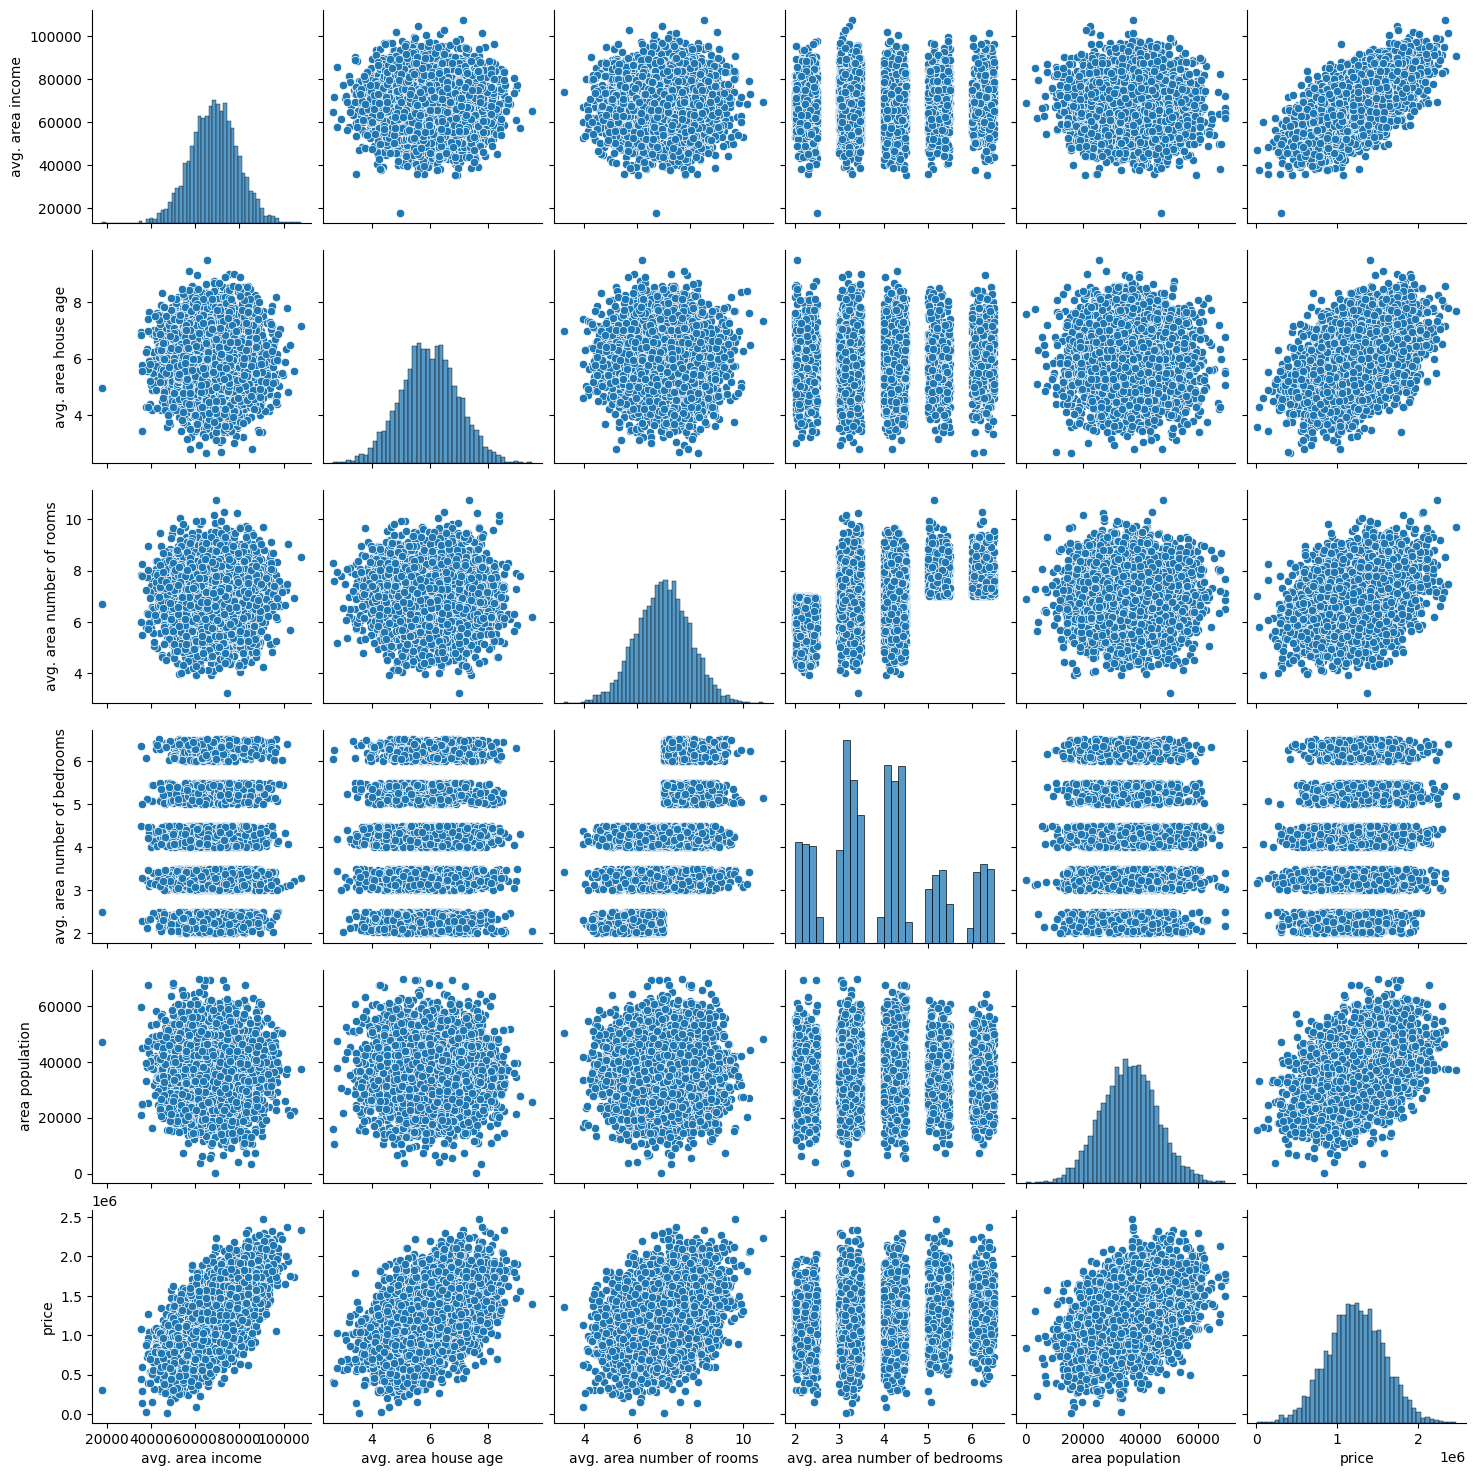

In [60]:
#plot pairwise relationships of the datasets
sns.pairplot(df_USAhousing)

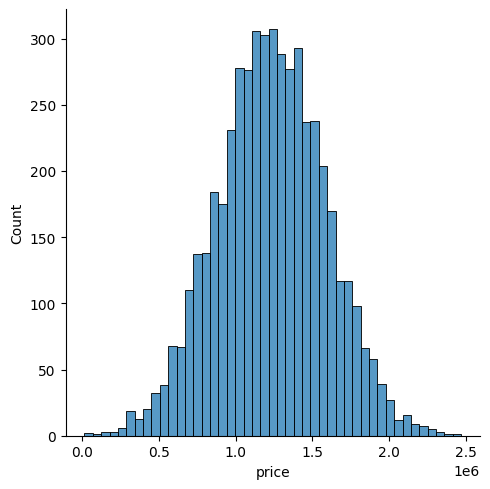

In [61]:
sns.displot(df_USAhousing['price'])

,avg. area income,avg. area house age,avg. area number of rooms,avg. area number of bedrooms,area population,price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


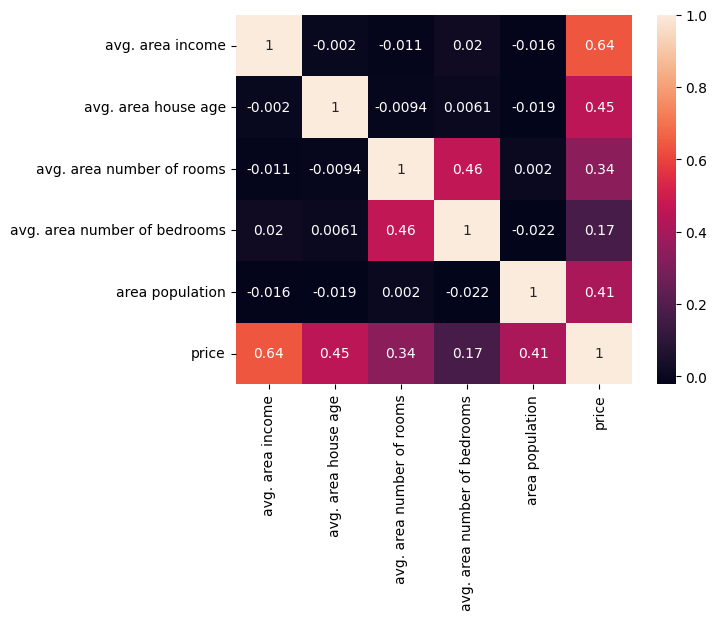

In [62]:
#remove the column address as datatype object
#plot heat map using sns
#using pandas correlation function
df_USAhousing.drop(['address'], axis=1, inplace=True)
sns.heatmap(df_USAhousing.corr(), annot=True)
df_USAhousing.head()

Training a Linear Regression Model

X and y arrays

In [63]:
X = df_USAhousing[['avg. area income', 'avg. area house age', 'avg. area number of rooms', 'avg. area number of bedrooms', 
                   'area population']]
y = df_USAhousing['price']

Train - Test Split

In [64]:
#Using sklearn model selection to split the dataset
from sklearn.model_selection import train_test_split

#split the dataset into train-test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)

Creating and Training the Model

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

Model Evaluation 

In [67]:
#print the intersept
print(lm.intercept_)

-2640159.7968526953


In [68]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
avg. area income,21.528276
avg. area house age,164883.282027
avg. area number of rooms,122368.678027
avg. area number of bedrooms,2233.801864
area population,15.150420


Prediction of the Model

In [69]:
predictions = lm.predict(x_test)

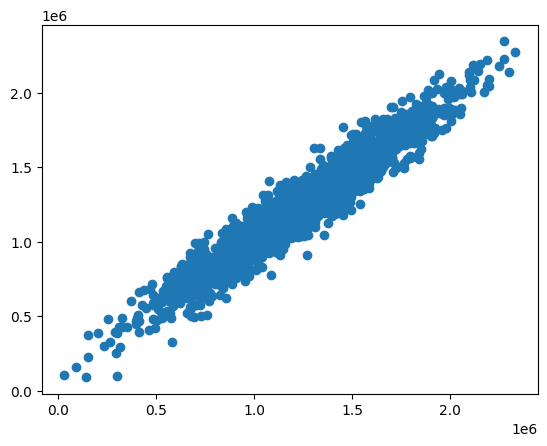

In [70]:
#Scatter plot
plt.scatter(y_test, predictions)

Residual Histogram

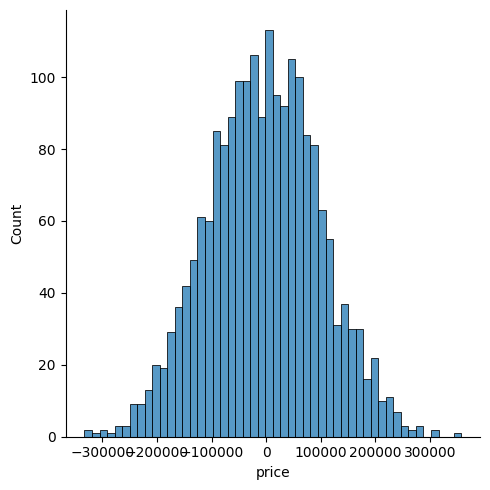

In [71]:
sns.displot((y_test-predictions), bins=50);

Regression Evaluation Matrix

In [72]:
from sklearn import metrics

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error(MAE):', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error(MAE): 82288.22251914942
Mean Squared Error(MSE): 10460958907.20898
Root Mean Squared Error(MAE): 102278.82922290899
